# Objectives

- Assess the performance of machine learning models

- Diagnose the common problems in machine learning algorithms 

- Evaluate the predictive models using the different performance metrics


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                 header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
target = df[1]

In [6]:
target.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: 1, dtype: float64

In [7]:
from sklearn.preprocessing import LabelEncoder

Take the independent variables as X and the column 1 as dependent variable. Use LabelEncoder for converting labels into integers.

In [8]:
X = df.loc[:,2:].values
y = df.loc[:, 1].values
le = LabelEncoder() # instantiate LabelEncoder 
y = le.fit_transform(y) # Fit le object and then transform labels to integers 
print(' Actual y labels: {}\n'.format(df.loc[:, 1].values[:5]),
      'Transformed y values: {}\n'.format(y[:5]),
      'All labels available in the data {}'.format(le.classes_))

 Actual y labels: ['M' 'M' 'M' 'M' 'M']
 Transformed y values: [1 1 1 1 1]
 All labels available in the data ['B' 'M']


In [9]:
df[1].map({'M':1,'B':0})

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
import numpy as np
print(np.unique(y, return_counts = True)) # number of 1's and 0's after transformation
print(np.unique(df.loc[:, 1], return_counts = True)) # Counts for each label in the original data

(array([0, 1]), array([357, 212]))
(array(['B', 'M'], dtype=object), array([357, 212]))


In [11]:
y.mean()

0.37258347978910367

__Train test split__

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

__Pipelines: Transformers and Estimators__ 

In [59]:
# preprocessing tools
from sklearn.preprocessing import StandardScaler # for scaling the features
from sklearn.preprocessing import PolynomialFeatures # for checking interaction effect between features

## models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
    
# for pipelines
from sklearn.pipeline import make_pipeline

In [60]:
## Let's start with Logistic Regression'

log_pipe = make_pipeline(StandardScaler(), # if we want to use regularization we need scaler 
                         PolynomialFeatures(degree=2, interaction_only= True), # we will only check the interactions, 
                         LogisticRegression(random_state = 1, solver = 'lbfgs'))

## Without further ado check the baseline

log_pipe.fit(X_train, y_train) # pipe behaves like sklearn estimator.

y_pred = log_pipe.predict(X_train) # predictions of vanilla log_reg model.

log_pipe.score(X_train, y_train) # score looks pretty impressive can we expect similar performance on the test?

0.9976525821596244

__An overview look for the pipelines__

<img src='img/pipelines.png' width = 450/>

[Source: Python Machine Learning](https://www.amazon.com/dp/1789955750?tag=duckduckgo-ffab-20&linkCode=osi&th=1&psc=1)

__Cross validation with pipelines__

__Holdout Cross_Validation__
<img src= 'img/cross_validation.png' width = 450/>

__Kfold Cross_Validation__

<img src = 'img/kfold_cross.png' width= 450/>

__Understanding Over or Underfitting__

In [61]:
import numpy as np

In [62]:
from sklearn.model_selection import validation_curve

parameters = [0.01, 0.1, 1, 10, 100] # we will be checking the regularization parameter in Log_reg

# we could do the same thing with

parameters = np.logspace(-3,2,5)

np.set_printoptions(suppress= True)

parameters

array([  0.001     ,   0.01778279,   0.31622777,   5.62341325,
       100.        ])

Now let's see how the train and validation scores are changing as we change C - Values:

In [63]:
train_scores, test_scores = validation_curve(estimator=log_pipe,
                                             X=X_train,
                                             y=y_train,
                                             # this is the way for accessing a parameter of a
                                             param_name='logisticregression__C',
                                             # transformer within pipeline
                                             param_range=parameters,
                                             cv=10,  # note that this can take too long if your data is big
                                             verbose=1,  # algorithms will update us about the progress
                                             n_jobs=-1  # we will be using the other processing units in parallel
                                             )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


Now we can simply plot the results

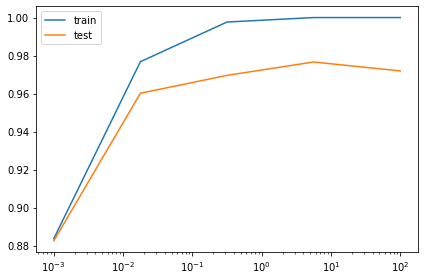

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(parameters, train_scores.mean(axis= 1), label = 'train')
plt.xscale('log')
plt.plot(parameters, test_scores.mean(axis = 1), label = 'test')
plt.legend()
plt.tight_layout()


__Fine-Tuning ML models via gridsearch__

GridSearch approach is very straight forward.

__Step1:__ Decide an estimator to use.

Suppose we would like to use a decision_tree classifier.

__Step2:__ Create a parameter grid

Suppose for the decision trees we would like to find best values for: 

max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

and 

max_features = ['auto', 'sqrt', 'log2', 25]

param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
              'max_features': ['auto', 'sqrt', 'log2', 25]
              }
              
__Step3:__ Instantiate GridSearchCV with these parameters.

__Step4:__ Fit gridsearchcv object.


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [16]:
from sklearn.model_selection import GridSearchCV

In [47]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=10)

max_depth_params = range(2, 12)  # values between 2 to 11 total: 10 values

max_features_param = [None, 'sqrt', 'log2', 25]  # total of 5 values, auto = sqrt

param_grid = {'max_depth': max_depth_params,
              'max_features': max_features_param}

gridsearch = GridSearchCV(estimator=tree_clf,
                          param_grid=param_grid,
                          n_jobs=-1,  # parallel computation
                          verbose=1,  # gives feedback
                          cv=10,  # cross-validate
                          scoring='roc_auc',  # you can use multiple scoring too
                          return_train_score=True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.7s finished


In [48]:
gridsearch.best_params_

{'max_depth': 4, 'max_features': 'sqrt'}

In [49]:
gridsearch.scorer_

make_scorer(roc_auc_score, needs_threshold=True)

In [50]:
print(gridsearch.best_score_) # note if you use multiple this doesn't work
print(gridsearch.best_estimator_) # doesn't work for multiple scoring

0.977488425925926
DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=10)


In [36]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
param_grid = {'penalty': ['l1','l2','elasticnet', None],
             'C': np.logspace(start=5, stop=14, base=10, num=10)}

In [37]:
gridsearch_lr = GridSearchCV(lr_clf, param_grid, cv=5, n_jobs=-1)

In [38]:
gridsearch_lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10, 1.e+11, 1.e+12,
       1.e+13, 1.e+14]),
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [39]:
gridsearch_lr.best_params_

{'C': 10000000000.0, 'penalty': 'l2'}

In [51]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)

In [52]:
colums = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

In [53]:
# Recall that gridsearch.best_estimator is an decisiontreeclassifier object
# so score returns 'accuracy' by default
gridsearch.best_estimator_.score(X_train, y_train)

0.9530516431924883

In [54]:
cv_results_df[colums].sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
9,"{'max_depth': 4, 'max_features': 'sqrt'}",0.977488,0.014268,1,0.988113,0.005609
23,"{'max_depth': 7, 'max_features': 25}",0.971954,0.020131,2,0.994491,0.001083
37,"{'max_depth': 11, 'max_features': 'sqrt'}",0.971775,0.018383,3,0.991932,0.002169
17,"{'max_depth': 6, 'max_features': 'sqrt'}",0.970690,0.027279,4,0.991426,0.001950
35,"{'max_depth': 10, 'max_features': 25}",0.970445,0.024978,5,0.994091,0.000961
30,"{'max_depth': 9, 'max_features': 'log2'}",0.970413,0.028492,6,0.991611,0.001801
21,"{'max_depth': 7, 'max_features': 'sqrt'}",0.970097,0.033874,7,0.991043,0.001673
25,"{'max_depth': 8, 'max_features': 'sqrt'}",0.969084,0.023230,8,0.992098,0.001481
13,"{'max_depth': 5, 'max_features': 'sqrt'}",0.968600,0.022716,9,0.991780,0.001693
33,"{'max_depth': 10, 'max_features': 'sqrt'}",0.968108,0.023988,10,0.991829,0.001651


In [55]:
import matplotlib.pyplot as plt

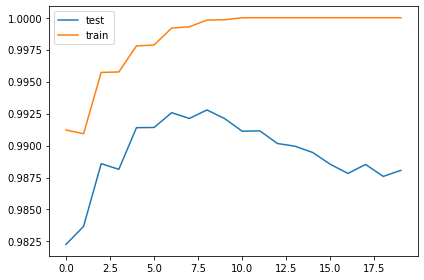

In [79]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(20), roc_test_scores, label = 'test')
plt.plot(range(20), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

We can also use pipelines with GridSearchCV. 

In [65]:
log_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [66]:
param_grid = {'logisticregression__C': np.logspace(-3, 2, 10),  
              'polynomialfeatures__interaction_only': [True, False]}


gridsearch = GridSearchCV(estimator = log_pipe, 
                          param_grid = param_grid,
                          n_jobs = -1, 
                          verbose = 1,
                          cv = 10, 
                          scoring = 'roc_auc', 
                          return_train_score= True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished


In [67]:
## let's see best score and best parameters

gridsearch.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('logisticregression',
                 LogisticRegression(C=0.1668100537200059, random_state=1))])

In [68]:
gridsearch.best_score_

0.9927884615384615

In [69]:
gridsearch.cv_results_

{'mean_fit_time': array([0.01758416, 0.0292007 , 0.03447199, 0.02883801, 0.02918348,
        0.02855642, 0.03339791, 0.0337096 , 0.03773203, 0.04165738,
        0.04945807, 0.05355477, 0.0627018 , 0.06338975, 0.07384467,
        0.07265468, 0.08391709, 0.09102662, 0.07772999, 0.06288972]),
 'std_fit_time': array([0.00317355, 0.00587788, 0.01059477, 0.00672175, 0.00598636,
        0.00407885, 0.00317281, 0.00176207, 0.00326067, 0.00500381,
        0.00594265, 0.00334876, 0.00400324, 0.00442671, 0.01189102,
        0.00751168, 0.01255253, 0.02328298, 0.01338394, 0.00966607]),
 'mean_score_time': array([0.00215907, 0.00385537, 0.00275722, 0.00404179, 0.00330975,
        0.00298615, 0.00283043, 0.0031131 , 0.00279171, 0.00330045,
        0.0028317 , 0.00324771, 0.00276418, 0.00296216, 0.00284979,
        0.0030333 , 0.00306625, 0.00303593, 0.00287418, 0.00226088]),
 'std_score_time': array([0.00045201, 0.00142307, 0.00048693, 0.00163975, 0.00119944,
        0.00037229, 0.00046707, 0.000792

In [70]:
colums = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

log_reg_results = pd.DataFrame(gridsearch.cv_results_)[colums]
log_reg_results.sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
8,"{'logisticregression__C': 0.1668100537200059, ...",0.992788,0.009508,1,0.999817,0.000071
6,{'logisticregression__C': 0.046415888336127795...,0.992575,0.010337,2,0.999195,0.000225
7,{'logisticregression__C': 0.046415888336127795...,0.992121,0.011486,3,0.999294,0.000217
9,"{'logisticregression__C': 0.1668100537200059, ...",0.992112,0.011341,4,0.999843,0.000073
5,"{'logisticregression__C': 0.01291549665014884,...",0.991417,0.012198,5,0.997869,0.000452
4,"{'logisticregression__C': 0.01291549665014884,...",0.991400,0.011428,6,0.997796,0.000472
11,"{'logisticregression__C': 0.5994842503189409, ...",0.991150,0.011069,7,1.000000,0.000000
10,"{'logisticregression__C': 0.5994842503189409, ...",0.991124,0.010840,8,1.000000,0.000000
12,"{'logisticregression__C': 2.1544346900318843, ...",0.990162,0.011817,9,1.000000,0.000000
13,"{'logisticregression__C': 2.1544346900318843, ...",0.989948,0.012203,10,1.000000,0.000000


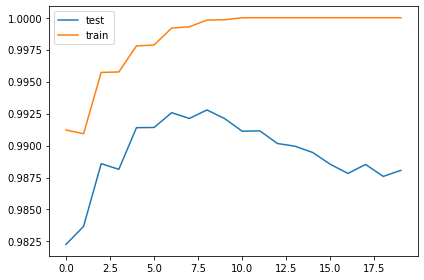

In [71]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(20), roc_test_scores, label = 'test')
plt.plot(range(20), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
gs = GridSearchCV(estimator= log_pipe, param_grid = param_grid, scoring = 'roc_auc', cv = 2 )

scores = cross_val_score(gs, X_train, y_train, scoring = 'roc_auc', cv = 5)

print('CV accuracy: %.3f +/- %.3f'%(np.mean(scores), np.std(scores)))

CV accuracy: 0.992 +/- 0.007


In [74]:
y_test_pred = gridsearch.best_estimator_.predict_proba(X_test)[:, 1]

In [75]:
y_test_pred[:5]

array([0.0268781 , 0.02032053, 1.        , 0.00427869, 0.00070141])

In [76]:
from sklearn.metrics import roc_auc_score

In [77]:
roc_auc_score(y_test, y_test_pred)

0.9926624737945493

## Extras

[Faster Hyperparameter tuning: Randomized Approach](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[Learning the hyperparameter space](https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a)

[Using sklearn for plotting learning curves](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

[YellowBrick Validation Curve](https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html)